In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
!head -n 10 yob1880.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
names1880 = pd.read_csv('yob1880.txt', names=['name','sex','births'])

In [44]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [45]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [46]:
pieces = []
for year in range(1880, 2011):
    path = f'yob{year}.txt'
    frame = pd.read_csv(path, names=['name','sex','births'])
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)

In [47]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [48]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [49]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<Axes: title={'center': 'Totaly births by year and sex'}, xlabel='year'>

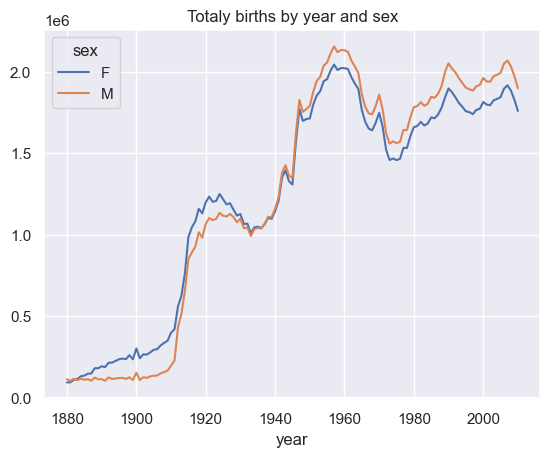

In [50]:
total_births.plot(title='Totaly births by year and sex')

In [51]:
def add_group(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

In [52]:
names = names.groupby(['year', 'sex']).apply(add_group)

In [67]:
names.reset_index(drop=True, inplace=True)

In [68]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [71]:
##Checking that it sums up to one
names.groupby(['year','sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [76]:
##Top1000 for each year-sex group
def top1000(group):
    return group.sort_values('births', ascending=False)[:1000]


In [77]:
grouped = names.groupby(['year','sex'])

In [78]:
top1000 = grouped.apply(top1000)

In [79]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [80]:
top1000 = top1000.reset_index(drop=True)

In [81]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [82]:
##Analyzing Naming Trends
boys = top1000[top1000['sex'] == 'M']
girls = top1000[top1000['sex'] == 'F']

In [84]:
##The number of handful names like Johns and Marys for each year
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')

In [85]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [86]:
##Taking a subset
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

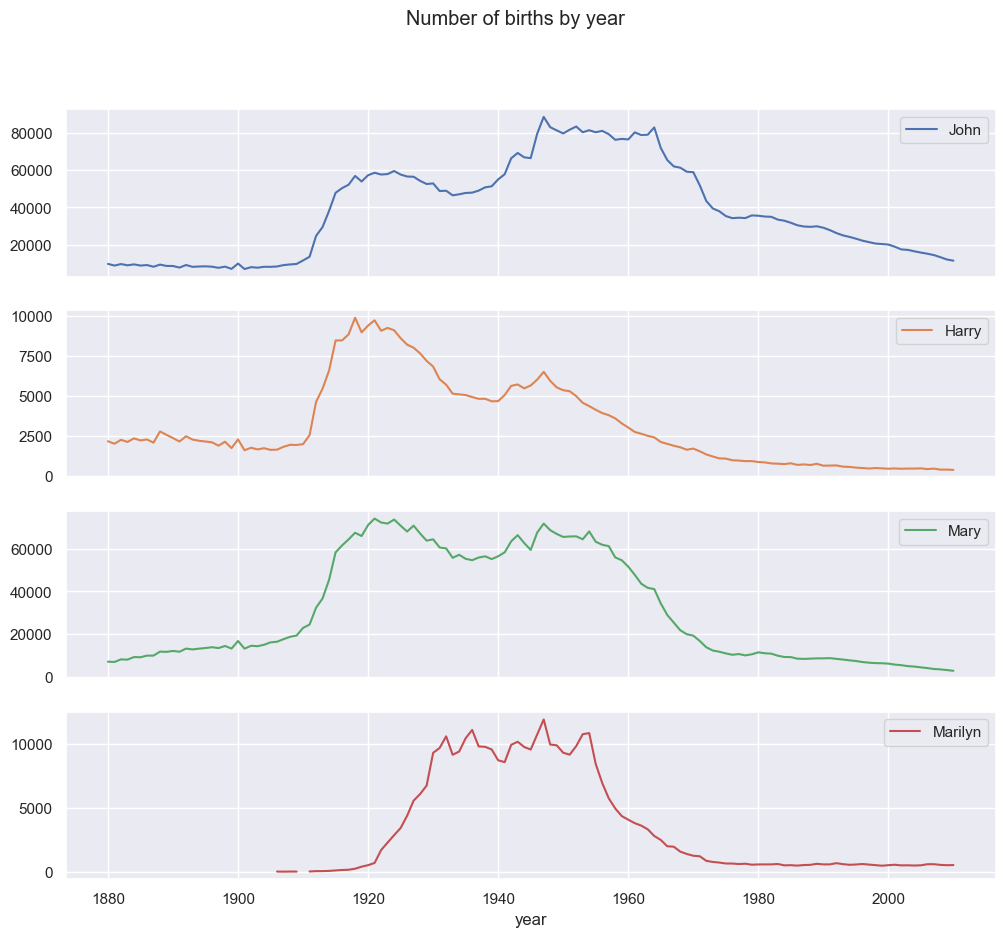

In [88]:
subset.plot(subplots=True, figsize=(12,10), title='Number of births by year')

In [89]:
##Measuring the increase in naming diversity

In [93]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')

In [94]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<Axes: title={'center': 'Sum of table1000 prop by year and sez'}, xlabel='year'>

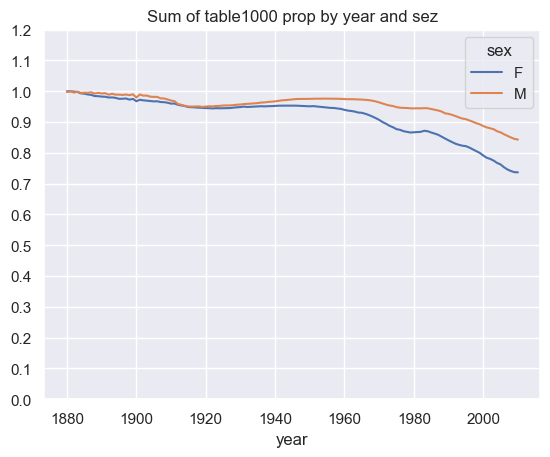

In [97]:
table.plot(title='Sum of table1000 prop by year and sez', yticks = np.linspace(0, 1.2, 13))

In [103]:
#How many of the most popular names it takes to reach 50% of the births
df = boys[boys['year'] == 2010]

In [104]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [105]:
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()

In [106]:
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [107]:
position = prop_cumsum.searchsorted(0.5)

In [108]:
position

116

In [109]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [110]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)

In [114]:
diversity = diversity.unstack()

<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

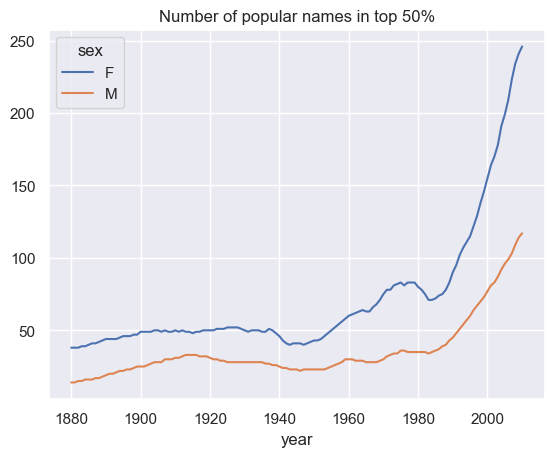

In [115]:
diversity.plot(title='Number of popular names in top 50%')

In [116]:
##the last letter evolution
def get_last_letter(x):
    return x[-1]

In [117]:
last_letters = names['name'].map(get_last_letter)

In [119]:
last_letters.name = 'last_letter'

In [120]:
table = names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc='sum')

In [122]:
subtable = table.reindex(columns=[1910,1960,2010], level='year')

In [124]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [131]:
##Normalizing by year and sex
letter_group = subtable / subtable.sum()

In [132]:
letter_group

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

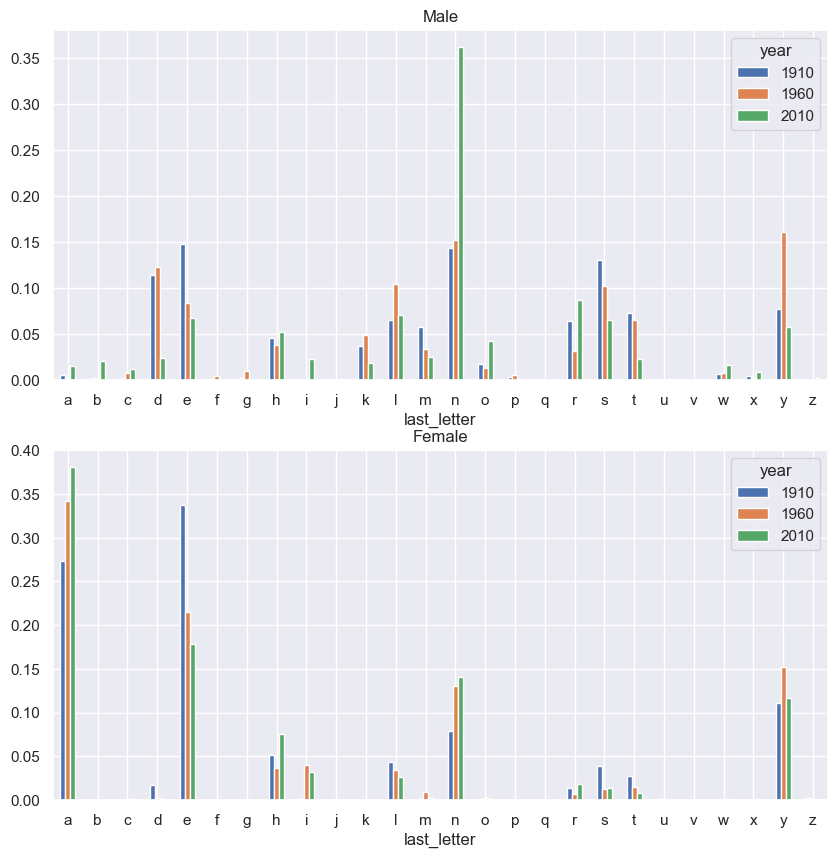

In [133]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

letter_group['M'].plot(kind='bar', rot=0, ax = axes[0], title='Male')
letter_group['F'].plot(kind='bar', rot=0, ax = axes[1], title='Female')

In [135]:
letter_prop = table/table.sum()

In [139]:
dny_ts = letter_prop.loc[['d','n','y'], 'M'].T

<Axes: xlabel='year'>

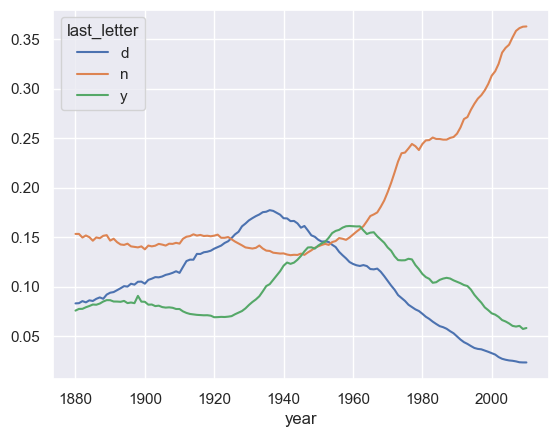

In [141]:
dny_ts.plot()

In [143]:
##Boy names become girl names and vice versa
##For example is the name Lesley or leslie

In [144]:
all_names = pd.Series(top1000['name'].unique())

In [145]:
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [146]:
lesley_like = all_names[all_names.str.contains('Lesl')]

In [147]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [148]:
filtered = top1000[top1000['name'].isin(lesley_like)]

In [150]:
filtered.groupby('name')['births'].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [151]:
table = filtered.pivot_table('births', index='year', columns='sex',aggfunc='sum')

In [152]:
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [153]:
table = table.div(table.sum(axis='columns'), axis='index')

In [154]:
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


<Axes: xlabel='year'>

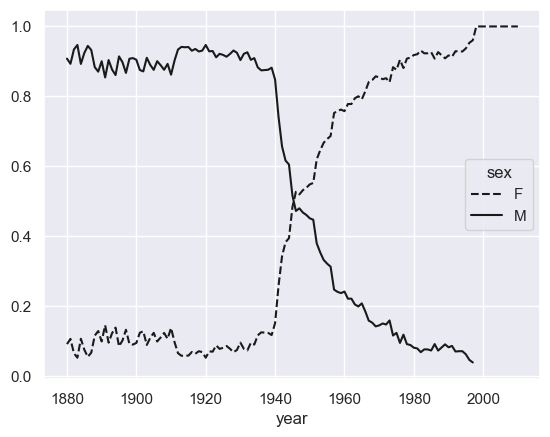

In [155]:
table.plot(style={'M':'k-', "F": 'k--'})